In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import numpy as np

In [3]:
rows = open("06.txt", "r").read().split("\n")
values = [tuple(int(y) for y in x.split(", ")) for x in rows]
df = pd.DataFrame(values, columns=["x", "y"])

Remove unused rows/cols at the beginning, but leave one empty:

In [4]:
df = df - df.min() + 1
df.tail()

,x,y
45,176,235
46,146,260
47,98,194
48,242,180
49,148,228


In [5]:
shape = df.max().values + 2
shape

array([306, 309], dtype=int64)

In [6]:
field = np.zeros(shape)
(lenx, leny) = field.shape

for row in df.itertuples():
    field[row.x + 1, row.y + 1] = row.Index + 1

countzeros = 1

a, b = 140, 30
while countzeros > 0:
    # print(field[a:a+10,b:b+10])
    countzeros = 0
    values_to_set = []
    for x in range(1, lenx - 1):
        for y in range(1, leny - 1):
            if field[x, y]:
                continue
            neighbours = [
                field[x - 1, y],
                field[x + 1, y],
                field[x, y + 1],
                field[x, y - 1],
            ]
            vals = set(v for v in neighbours if v != 0)
            if not len(vals):
                countzeros += 1
                continue
            if len(vals) > 1:
                res = -1
            else:  # len(vals)==1:
                res = vals.pop()
            values_to_set.append((x, y, res))
    for x, y, v in values_to_set:
        field[x, y] = v

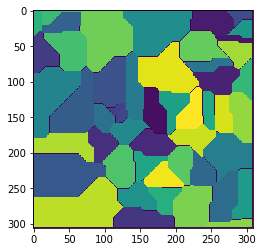

In [7]:
# plt.imshow(field[100:150,100:200]);
plt.imshow(field);

In [8]:
from collections import Counter

All elements that are closest to some point on the border have infinite size:

In [9]:
boundary = set(field[1, :])
boundary.update(set(field[-2, :]))
boundary.update(set(field[:, 1]))
boundary.update(set(field[:, -2]))
# boundary

In [10]:
cnt = Counter(field.flatten())

In [11]:
for key in boundary:
    del cnt[key]

In [12]:
max(cnt.values())

3871

# Part II

In [13]:
lenx, leny = df.max().values + 1

In [14]:
def dist(x, y):
    return sum(abs(np.mgrid[-x : lenx - x, -y : leny - y]))

In [15]:
distances = sum(dist(x, y) for (i, x, y) in df.itertuples())

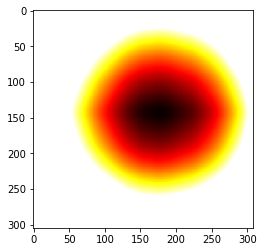

In [16]:
plt.imshow(distances, cmap="hot", interpolation="nearest", vmax=10000)

In [17]:
np.sum(distances < 10000)

44667